In [2]:
from sklearn.linear_model import Ridge

In [3]:
import pandas as pd
import numpy as np
from pandas import Series

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
cols = ["Y1", "X3_dummy", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14_dummy", "logX15", "logX16", "X17", "X18", "X19", "logX20", "logX21", "X22", "X23_dummy", "X24_dummy", "X25", "X26", "X27", "X28", "X29"]

In [9]:
df = pd.read_csv('/Users/artemsmirnov/Desktop/Pictures/alpha_alpha.txt', sep=" ", header=None, names=cols)

In [10]:
#split data into test and train sets
split = train_test_split(df, test_size=0.25, random_state=42)
(trainAttrX, testAttrX) = split
trainY = trainAttrX["Y1"]
testY = testAttrX["Y1"]

In [11]:
#pd.DataFrame(trainY).to_excel('trainY_log_scale.xlsx')

In [12]:
#we have to standardize our data only after splitting

In [13]:
trainAttrX = trainAttrX.drop('Y1', axis=1)
#trainAttrX = trainAttrX.drop('No', axis=1)
testAttrX = testAttrX.drop('Y1', axis=1)
#testAttrX = testAttrX.drop('No', axis=1)

cs = StandardScaler()
trainAttrX = cs.fit_transform(trainAttrX)
testAttrX = cs.transform(testAttrX)

In [15]:
testY

83    1.837094
53    3.400836
70    3.303908
45    3.786768
44    3.846736
39    3.428673
22    3.889968
80    2.608410
10    3.315883
0     4.789782
18    4.135984
30    4.656339
73    2.529243
33    1.142603
90    2.676285
4     4.124488
76    3.828405
77    3.885701
12    3.529951
31    4.308572
55    3.607690
88    1.430382
26    3.846506
42    3.903364
69    3.523201
Name: Y1, dtype: float64

# Ridge

In [399]:
#fix alpha for Ridge, we should not normalize data after standardization, interception is true
ridgeReg = Ridge(alpha=1, normalize=False)

In [400]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [401]:
#this function can help us to find the optimal alpha
for a in alphas:
    model_ridge = Ridge(alpha=a).fit(trainAttrX,trainY)   
    score_ridge = model_ridge.score(trainAttrX,trainY)
    pred_y = model_ridge.predict(trainAttrX)
    mse = mean_squared_error(trainY, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.00, MSE:0.12, RMSE:0.35
Alpha:0.0010, R2:0.00, MSE:0.12, RMSE:0.35
Alpha:0.0100, R2:0.00, MSE:0.12, RMSE:0.35
Alpha:0.1000, R2:0.00, MSE:0.12, RMSE:0.35
Alpha:0.3000, R2:0.00, MSE:0.12, RMSE:0.35
Alpha:0.5000, R2:0.00, MSE:0.12, RMSE:0.35
Alpha:0.7000, R2:0.00, MSE:0.12, RMSE:0.35
Alpha:1.0000, R2:0.00, MSE:0.12, RMSE:0.35


In [402]:
ridgeReg.fit(trainAttrX,trainY)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [403]:
test_ridge = ridgeReg.predict(testAttrX)

In [404]:
mse_ridge = np.mean((test_ridge - testY)**2)

In [405]:
mse_ridge

0.43623723879168486

In [406]:
ridgeReg.score(testAttrX,testY)

0.4621699619660426

In [407]:
ridgeReg.coef_

array([-5.82972584e-02,  6.27099911e-03, -3.43934895e-02,  1.04920393e-02,
       -1.09658581e-01, -7.00060069e-03, -3.35513708e-02, -2.76091015e-02,
        7.79766798e-02,  2.36503542e-01, -6.75945491e-02,  1.10664601e-01,
        5.30055086e-02,  8.28566738e-02,  2.78157024e-01,  2.86253494e-01,
       -1.06670006e-01,  2.08295437e-01,  3.81140429e-02,  8.20405646e-02,
       -8.79393141e-02,  6.03364402e-02, -7.41465926e-03, -5.13685585e-02,
        9.75403832e-02, -2.73276625e-04,  1.80028505e-01])

In [408]:
coef = pd.Series(ridgeReg.coef_, predictors).sort_values()

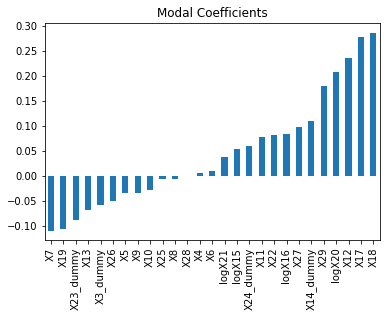

In [409]:
#checking the magnitude of coefficients

predictors = cols[1:]

coef = Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')
#plt.savefig('ridge.png')

In [410]:
#show coefficients of the regression
coef

X7          -0.109659
X19         -0.106670
X23_dummy   -0.087939
X13         -0.067595
X3_dummy    -0.058297
X26         -0.051369
X5          -0.034393
X9          -0.033551
X10         -0.027609
X25         -0.007415
X8          -0.007001
X28         -0.000273
X4           0.006271
X6           0.010492
logX21       0.038114
logX15       0.053006
X24_dummy    0.060336
X11          0.077977
X22          0.082041
logX16       0.082857
X27          0.097540
X14_dummy    0.110665
X29          0.180029
logX20       0.208295
X12          0.236504
X17          0.278157
X18          0.286253
dtype: float64

In [411]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [412]:
train_ridge = ridgeReg.predict(trainAttrX)
pd.DataFrame(train_ridge).to_excel('train_ridge.xlsx')

In [457]:
train_ridge = ridgeReg.predict(testAttrX)
pd.DataFrame(test_ridge).to_excel('test_ridge.xlsx')

# Lasso

In [413]:
from sklearn.linear_model import Lasso

In [414]:
#same fo lasso, alpha is fixed too
lassoReg = Lasso(alpha=0.1, normalize=False)

In [415]:
lasso = lassoReg.fit(trainAttrX,trainY)
lasso

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [416]:
for a in alphas:
    model_lasso = Lasso(alpha=a).fit(trainAttrX,trainY)   
    score_lasso = model_lasso.score(trainAttrX,trainY)
    pred_y = model_lasso.predict(trainAttrX)
    mse = mean_squared_error(trainY, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.00, MSE:0.12, RMSE:0.35
Alpha:0.0010, R2:0.00, MSE:0.12, RMSE:0.35
Alpha:0.0100, R2:0.00, MSE:0.13, RMSE:0.35
Alpha:0.1000, R2:0.00, MSE:0.21, RMSE:0.45
Alpha:0.3000, R2:0.00, MSE:0.46, RMSE:0.68
Alpha:0.5000, R2:0.00, MSE:0.60, RMSE:0.77
Alpha:0.7000, R2:0.00, MSE:0.60, RMSE:0.77
Alpha:1.0000, R2:0.00, MSE:0.60, RMSE:0.77


In [417]:
test_lasso = lassoReg.predict(testAttrX)

In [418]:
# calculating mse

In [419]:
mse_lasso = np.mean((test_lasso - testY)**2)

In [420]:
mse_lasso

0.4236421615331068

In [421]:
lassoReg.score(testAttrX,testY)

0.4776982348383559

In [422]:
coef = pd.Series(lassoReg.coef_, predictors).sort_values()

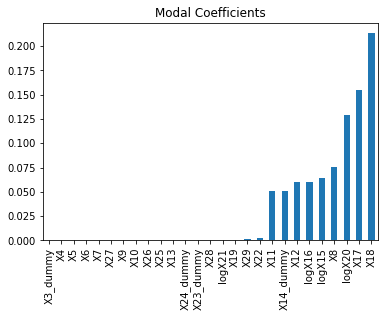

In [423]:
#checking the magnitude of coefficients

predictors = cols[1:]

coef = Series(lassoReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [424]:
coef

X3_dummy    -0.000000
X4           0.000000
X5           0.000000
X6          -0.000000
X7          -0.000000
X27         -0.000000
X9           0.000000
X10          0.000000
X26          0.000000
X25         -0.000000
X13         -0.000000
X24_dummy    0.000000
X23_dummy    0.000000
X28          0.000000
logX21       0.000000
X19         -0.000000
X29          0.001972
X22          0.002293
X11          0.050835
X14_dummy    0.051312
X12          0.060068
logX16       0.060339
logX15       0.064252
X8           0.075952
logX20       0.129552
X17          0.154332
X18          0.213139
dtype: float64

In [425]:
train_lasso = lassoReg.predict(trainAttrX)
pd.DataFrame(train_lasso).to_excel('train_lasso.xlsx')

In [458]:
test_lasso = lassoReg.predict(testAttrX)
pd.DataFrame(test_lasso).to_excel('test_lasso.xlsx')

# LARS

In [426]:
from sklearn.linear_model import LassoLarsIC

In [427]:
import time

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(testAttrX, testY)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

In [428]:
EPSILON = 1e-4

Text(0.5, 1.0, 'Information-criterion for model selection (training time 0.020s)')

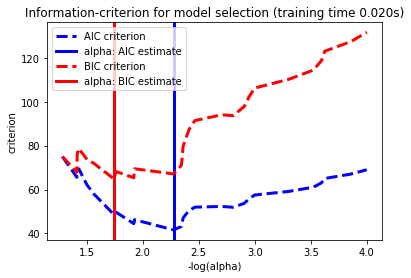

In [429]:
#in this model we don't fix alpha, optimal alpha is output of the function

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(trainAttrX, trainY)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(trainAttrX, trainY)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

In [430]:
model_bic.alpha_

0.017984192889318674

In [431]:
min(model_aic.criterion_)

41.62892386182156

In [432]:
model_aic.alpha_

0.005202886751709617

In [433]:
min(model_bic.criterion_)

64.89635088732739

In [434]:
coef = pd.Series(model_bic.coef_, predictors).sort_values()

In [435]:
test_lars = model_bic.predict(testAttrX)

In [436]:
coef_new = pd.Series(model_bic.coef_, predictors).sort_values()

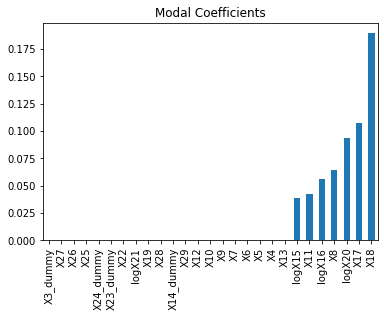

In [437]:
#checking the magnitude of coefficients

predictors = cols[1:]

coef_new = Series(model_bic.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [438]:
coef_new

X3_dummy     0.000000
X27          0.000000
X26          0.000000
X25          0.000000
X24_dummy    0.000000
X23_dummy    0.000000
X22          0.000000
logX21       0.000000
X19          0.000000
X28          0.000000
X14_dummy    0.000000
X29          0.000000
X12          0.000000
X10          0.000000
X9           0.000000
X7           0.000000
X6           0.000000
X5           0.000000
X4           0.000000
X13          0.000000
logX15       0.039209
X11          0.042354
logX16       0.055784
X8           0.064623
logX20       0.094027
X17          0.107752
X18          0.189312
dtype: float64

In [439]:
mse_lars = np.mean((test_lars - testY)**2)
mse_lars

0.46073371203622593

In [440]:
train_lars = model_bic.predict(trainAttrX)
pd.DataFrame(train_lars).to_excel('train_lars.xlsx')

In [459]:
test_lars = model_bic.predict(testAttrX)
pd.DataFrame(test_lars).to_excel('test_lars.xlsx')

# Elastic Net

In [441]:
from sklearn.linear_model import ElasticNet

In [442]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [443]:
elastic=ElasticNet(alpha=0.01).fit(trainAttrX, trainY)
ypred = elastic.predict(testAttrX)
score = elastic.score(testAttrX, testY)
mse = mean_squared_error(testY, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.462, MSE:0.44, RMSE:0.66


In [444]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [445]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(trainAttrX,trainY)   
    score = model.score(trainAttrX,trainY)
    pred_y = model.predict(trainAttrX)
    mse = mean_squared_error(trainY, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.80, MSE:0.12, RMSE:0.35
Alpha:0.0010, R2:0.80, MSE:0.12, RMSE:0.35
Alpha:0.0100, R2:0.80, MSE:0.12, RMSE:0.35
Alpha:0.1000, R2:0.73, MSE:0.16, RMSE:0.40
Alpha:0.3000, R2:0.53, MSE:0.28, RMSE:0.53
Alpha:0.5000, R2:0.33, MSE:0.40, RMSE:0.63
Alpha:0.7000, R2:0.11, MSE:0.53, RMSE:0.73
Alpha:1.0000, R2:0.00, MSE:0.60, RMSE:0.77


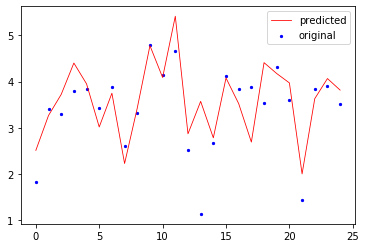

In [446]:
x_ax = range(len(testAttrX))
plt.scatter(x_ax, testY, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [447]:
coef_EN = pd.Series(elastic.coef_, predictors).sort_values()

In [448]:
coef_EN

X19         -0.097100
X7          -0.083285
X23_dummy   -0.077486
X13         -0.054841
X3_dummy    -0.037353
X26         -0.030177
X9          -0.021297
X5          -0.012710
X10         -0.010309
X4          -0.000000
X6          -0.000000
X8           0.000000
X25         -0.000000
X28          0.000000
logX21       0.034522
X24_dummy    0.054183
logX15       0.064502
X11          0.070335
X27          0.074776
logX16       0.075300
X22          0.075825
X14_dummy    0.117402
X29          0.156591
logX20       0.193821
X12          0.222755
X18          0.273864
X17          0.276697
dtype: float64

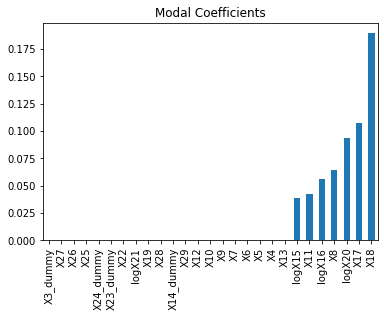

In [449]:
#checking the magnitude of coefficients

predictors = cols[1:]

coef_EN = Series(elastic.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [450]:
test_en = elastic.predict(testAttrX)

In [451]:
mse_en = np.mean((test_en - testY)**2)
mse_en

0.4364612847150486

In [452]:
train_en = elastic.predict(trainAttrX)

In [453]:
pd.DataFrame(train_en).to_excel('train_en.xlsx')

In [460]:
test_en = elastic.predict(testAttrX)
pd.DataFrame(test_en).to_excel('test_en.xlsx')

In [454]:
model.alpha_

AttributeError: 'ElasticNet' object has no attribute 'alpha_'

In [455]:
model

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [456]:
LassoLarsIC.alpha_

AttributeError: type object 'LassoLarsIC' has no attribute 'alpha_'